# KNN: Clasificación y Regresión con k-Nearest Neighbors

KNN (K-Nearest Neighbors) es un algoritmo supervisado que **no aprende explícitamente** un modelo: simplemente almacena los datos de entrenamiento y, para una nueva instancia, busca los `k` vecinos más cercanos.

**Usos**:
- Clasificación → `KNeighborsClassifier`
- Regresión → `KNeighborsRegressor`

Se basa en distancias como Euclídea, Manhattan, etc.

## Clasificación con KNN

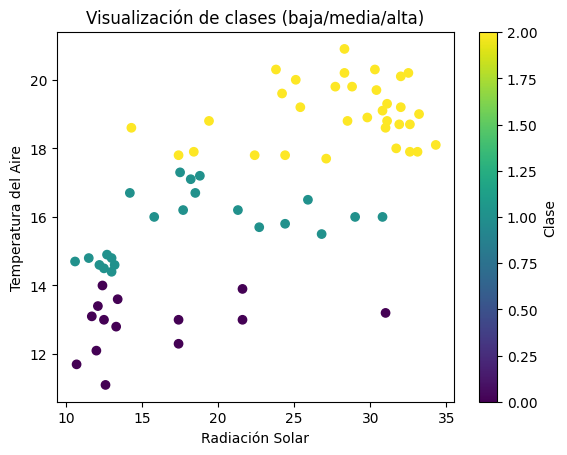

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el archivo CSV
df = pd.read_csv("AllData1.csv")

#Selección variable independiente y dependiente para la regresión lineal
X = df[['radiacion_solar']]
# Convertimos la temperatura en categorías
y = pd.cut(df['temp_aire'], bins=3, labels=['baja', 'media', 'alta'])

# Visualización de clases en el dataset original
plt.scatter(X['radiacion_solar'], df['temp_aire'], c=y.cat.codes, cmap='viridis')
plt.xlabel("Radiación Solar")
plt.ylabel("Temperatura del Aire")
plt.title("Visualización de clases (baja/media/alta)")
plt.colorbar(label='Clase')
plt.show()

In [5]:
# División y escalado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Evaluación
y_pred = knn_clf.predict(X_test)
print(" Clasificación KNN:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

 Clasificación KNN:
[[6 0 0]
 [1 1 0]
 [2 3 1]]
              precision    recall  f1-score   support

        alta       0.67      1.00      0.80         6
        baja       0.25      0.50      0.33         2
       media       1.00      0.17      0.29         6

    accuracy                           0.57        14
   macro avg       0.64      0.56      0.47        14
weighted avg       0.75      0.57      0.51        14



In [6]:
from sklearn.model_selection import cross_val_score

# Validación cruzada para evaluar estabilidad del modelo
scores = cross_val_score(knn_clf, scaler.fit_transform(X), y, cv=5)
print(f"Puntajes de validación cruzada (cv=5): {scores}")
print(f"Promedio de exactitud: {scores.mean():.2f}")

Puntajes de validación cruzada (cv=5): [0.71428571 0.64285714 0.42857143 0.5        0.53846154]
Promedio de exactitud: 0.56


In [7]:
# Comparación del modelo variando el número de vecinos (k)
print("Comparación de exactitud para distintos valores de k:")
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f"k={k}: exactitud={score:.2f}")

Comparación de exactitud para distintos valores de k:
k=1: exactitud=0.57
k=2: exactitud=0.57
k=3: exactitud=0.50
k=4: exactitud=0.50
k=5: exactitud=0.57
k=6: exactitud=0.50
k=7: exactitud=0.57
k=8: exactitud=0.57
k=9: exactitud=0.57
k=10: exactitud=0.57


## Regresión con KNN

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar datos
X_r= df[['radiacion_solar']]
y_r= df[['temp_aire']]

# División y escalado
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42)
X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

# Modelo de regresión
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_r, y_train_r)

# Evaluación
y_pred_r = knn_reg.predict(X_test_r)
print("📉 Regresión KNN:")
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("R²:", r2_score(y_test_r, y_pred_r))

📉 Regresión KNN:
MSE: 3.787685714285716
R²: 0.40203428055931434


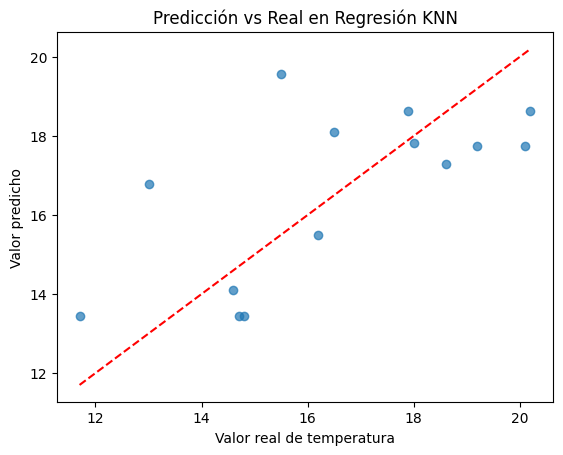

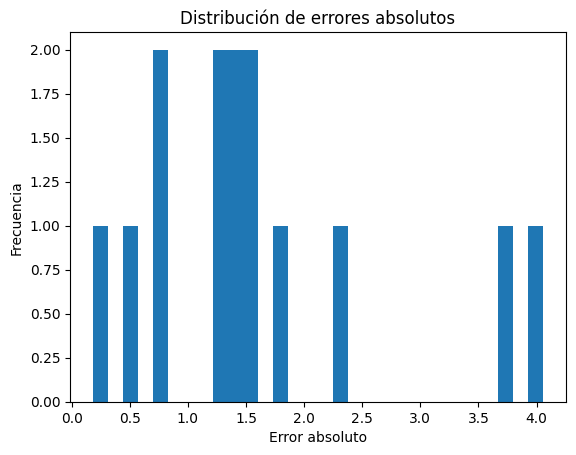

In [9]:
# Visualización de predicción vs real
plt.scatter(y_test_r, y_pred_r, alpha=0.7)
plt.xlabel("Valor real de temperatura")
plt.ylabel("Valor predicho")
plt.title("Predicción vs Real en Regresión KNN")
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.show()

# Errores absolutos
errores = np.abs(y_test_r.values.flatten() - y_pred_r.flatten())
plt.hist(errores, bins=30)
plt.title("Distribución de errores absolutos")
plt.xlabel("Error absoluto")
plt.ylabel("Frecuencia")
plt.show()